# IIA 2024 - Aprendizaje Automatizado

## Introducción a Jupyter Notebooks y Generación de Datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Diagonales

Generar n datos con d inputs:

  - n/2 pertenecientes a la categoría 0. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (-1, -1, -1, ... , -1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).
  - n/2 pertenecientes a la categoría 1. Esta clase corresponde a puntos generados al azar, provenientes de una distribución normal, con centro en el (1, 1, 1, ... ,1) y matriz de covarianza diagonal, con desviación estándar igual a C * SQRT(d).


In [ ]:
def centroGauss(d, v):
  return [v for x in range(d)]

def covMatrix(d, C):
  return [[(C*np.sqrt(d))**2 if (x == y) else 0 for y in range(d)] for x in range(d)]

def diagonales(n, d, C):
  n0 = int(n/2)
  n1 = n - n0
  matriz = covMatrix(d, C)
  valores0 = np.random.multivariate_normal(centroGauss(d, -1), matriz, n0)
  valores1 = np.random.multivariate_normal(centroGauss(d, 1), matriz, n1)

  data = [[0, *x] for x in valores0] + [[1, *x] for x in valores1]

  return pd.DataFrame(data, columns=['Target', *['d' + str(x) for x in range(d)]])

Verificamos ahora los datos generados, mostrándolos con matplotlib.pyplot

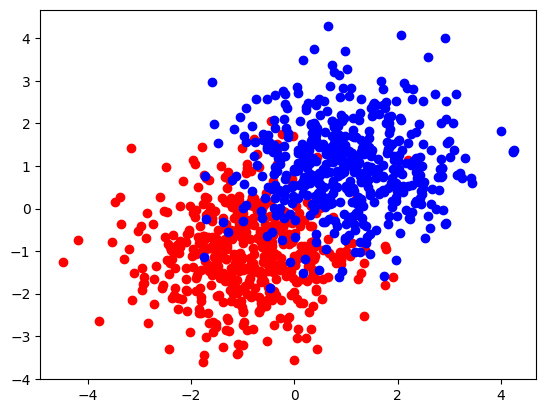

In [ ]:
diag_df = diagonales(1000, 2, 0.75)

valores0 = [row[1:] for row in diag_df[diag_df['Target'] == 0].values]
valores1 = [row[1:] for row in diag_df[diag_df['Target'] == 1].values]

xs0, ys0 = [x for x,y in valores0], [y for x,y in valores0]
xs1, ys1 = [x for x,y in valores1], [y for x,y in valores1]

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Paralelas

Igual al punto anterior, pero las distribuciones tienen centro en el ( 1, 0, 0, .... , 0 ) y en el ( -1, 0, 0, .... , 0 ), respectivamente y la desviación estandar es igual a C independientemente de d.

In [ ]:
def covMatrixP(d, C):
  return [[C**2 if (x == y) else 0 for y in range(d)] for x in range(d)]

def paralelas(n, d, C):
  n0 = int(n/2)
  n1 = n - n0
  matriz = covMatrixP(d, C)
  centro = centroGauss(d, 0)
  centro[0] = 1
  valores0 = np.random.multivariate_normal(centro, matriz, n0)
  centro[0] = -1
  valores1 = np.random.multivariate_normal(centro, matriz, n1)

  data = [[0, *x] for x in valores0] + [[1, *x] for x in valores1]

  return pd.DataFrame(data, columns=['Target', *['d' + str(x) for x in range(d)]])

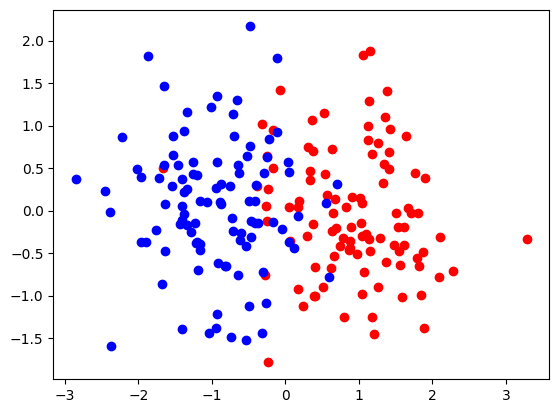

In [ ]:
diag_df = paralelas(200, 2, 0.75)

valores0 = [row[1:] for row in diag_df[diag_df['Target'] == 0].values]
valores1 = [row[1:] for row in diag_df[diag_df['Target'] == 1].values]

xs0, ys0 = [x for x,y in valores0], [y for x,y in valores0]
xs1, ys1 = [x for x,y in valores1], [y for x,y in valores1]

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

## Espirales

Generar n datos. De los n puntos generados, n/2 deben pertenecer a cada clase.

Los datos tienen 2 inputs, x e y, que corresponden a puntos generados al azar con una distribución UNIFORME (en dicho sistema de referencia x-y) dentro de un circulo de radio 1.

El output es binario, correspondiendo la clase 0 a los puntos que se encuentran entre las curvas ro = theta/4pi y ro = (theta + pi)/4pi (en polares) y la clase 1 al resto.

In [ ]:
def cartesian_to_polar(x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r, theta

def is_inside_curve(rho, theta, npi):
  rho_curve1 = (theta + (npi-1)*np.pi) / (4 * np.pi)
  rho_curve2 = (theta + npi*np.pi) / (4 * np.pi)
  return rho_curve1 <= rho <= rho_curve2

def is_inside_curves(x, y):
    rho, theta = cartesian_to_polar(x, y)
    return is_inside_curve(rho, theta, 1) or is_inside_curve(rho, theta, 3) or is_inside_curve(rho, theta, 5)

def espirales(n):
  n0 = int(n/2)
  n1 = n - n0
  i0, i1 = 0, 0
  values0, values1 = [], []
  while (i0 + i1 < n):
    x, y, a, b = np.random.rand(4)
    if (np.sqrt(x**2 + y**2) > 1):
      continue
    if (a < 0.5):
      x = -x
    if (b < 0.5):
      y = -y
    if (is_inside_curves(x, y)):
      if (i0 != n0):
        values0.append([x, y])
        i0 += 1
    else:
      if (i1 != n1):
        values1.append([x, y])
        i1 += 1

  data = [[0, *x] for x in values0] + [[1, *x] for x in values1]

  return pd.DataFrame(data, columns=['Target', 'd1', 'd2'])

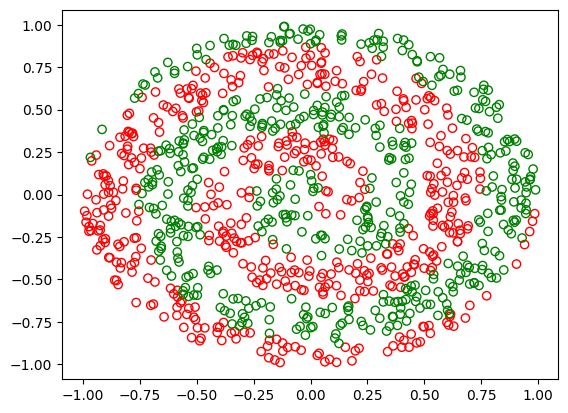

In [ ]:
espiral_df = espirales(1000)

valores0 = [row[1:] for row in espiral_df[espiral_df['Target'] == 0].values]
valores1 = [row[1:] for row in espiral_df[espiral_df['Target'] == 1].values]

xs0, ys0 = [x for x,y in valores0], [y for x,y in valores0]
xs1, ys1 = [x for x,y in valores1], [y for x,y in valores1]

plt.scatter(xs0, ys0, facecolors='none', color='red')
plt.scatter(xs1, ys1, facecolors='none', color='green')
plt.show()